***Gradient Descent from Scratch***

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X, y = make_regression(
    n_samples=150,
    n_features=1,
    n_targets=1,
    noise=25,
    random_state=20,
)

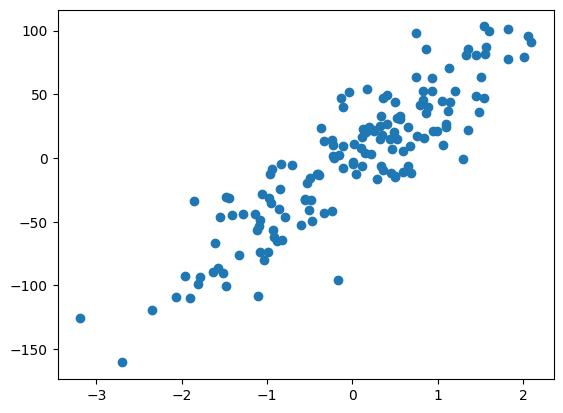

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 20)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
linear_regression = LinearRegression()

In [8]:
linear_regression.fit(X_train,y_train)
print(f"{linear_regression.coef_} {linear_regression.intercept_}")

[45.26976471] -1.3962047280593406


In [9]:
np.mean(cross_val_score(linear_regression, X_train, y_train, scoring="r2", cv=10))

np.float64(0.7834813836176688)

# Creating gradient descent to get the best value

In [10]:
class GradientDescent:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = 23
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.b = self.b - self.learning_rate * (
                -2 * np.sum(y - self.m * X.ravel() - self.b)
            )
            self.m = self.m - self.learning_rate * (
                -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            )
        print(self.m)
        print(self.b)

    def predict(self, X):
        return self.m * X + self.b

In [11]:
gd = GradientDescent(0.001, 100)

In [12]:
gd.fit(X_train, y_train)

45.26976470634375
-1.3962047280002092


*lol! :) almost same*

In [14]:
y_pred = gd.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7519320361656965